In [5]:

import numpy as np
import pandas as pd
import pandas_datareader as pdr

intel = pdr.get_data_yahoo('INTC', start="01/01/2017", interval="m")
amd = pdr.get_data_yahoo('AMD', start="01/01/2017", interval="m")


intel["r"] = np.log(intel['Adj Close']) - np.log(intel['Adj Close'].shift(1))
amd["r"] = np.log(amd['Adj Close']) - np.log(amd['Adj Close'].shift(1))




In [6]:
intel_mean = intel["r"].mean()
amd_mean = amd["r"].mean()
intel_var = intel["r"].var()
amd_var = amd["r"].var()
intel_count = intel["r"].var()
amd_count = amd["r"].var()
t = (intel_mean - amd_mean + 0) / ( np.sqrt((1 / (intel_count+amd_count))*(intel_var+amd_var)))
print(t)

-0.03141690592273666


In [8]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


<Figure size 432x288 with 0 Axes>

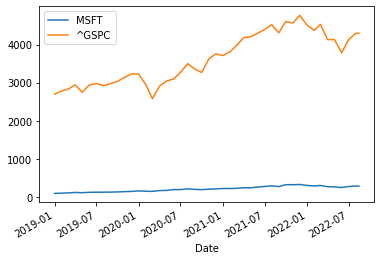

In [9]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

In [10]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

<Figure size 432x288 with 0 Axes>

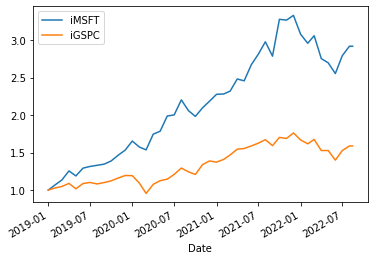

In [11]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

In [13]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083538,0.066658


<Figure size 432x288 with 0 Axes>

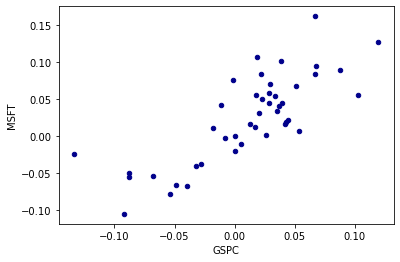

In [14]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

<Figure size 432x288 with 0 Axes>

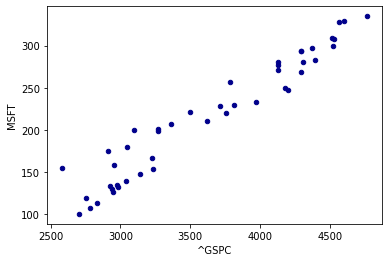

In [15]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

In [16]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr
corr[[0]]
corr[0][1]

0.7922750217295258